# PS4E2:Multi-Class Prediction of Obesity Risk

## Objectives

The primary objective of multiclass obesity prediction is to accurately classify individuals into different obesity categories, which typically include classes such as underweight, normal weight, overweight, and obese. This classification assists in identifying individuals at risk of obesity-related health issues and allows for targeted interventions and healthcare management strategies.

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="# Import Libraries">Import Libraries</a>
    <li><a href="#Data Acquisition">Data Acquisition</a></li>
    <li><a href="#Data Wrangling/Quick Overview">Data Wrangling/Quick Overview</a></li>
    <li><a href="EDA with Data Vizualization">EDA with Data Vizualization</a></li>
        <ul>
            <li><a href="#Target Analysis">Target Analysis</a></li>
            <li><a href="#Individual Numerical Plots">Individual Numerical Plots</a></li>
            <li><a href="#Individual Categorical Plots">Individual Categorical Plots</a></li>
            <li><a href="#Combined Numerical Plots">Combined Numerical Plots</a></li>
        </ul>
    </li>
    <li><a href="#Feature Engeneiring">Feature Engeneiring</a></li>
    <li><a href="Model">EDA with Data Vizualization</a></li>
        <ul>
            <li><a href="#Logistic Regression">Logistic Regression</a></li>
            <li><a href="#Decission Tree">Decission Tree</a></li>
            <li><a href="#K-Nearest Neighbours">K-Nearest Neighbours</a></li>
        </ul>
     <li><a href="#Submission">Submission</a></li>
</div>
 
<hr>

# Import Libraries

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import jaccard_score, f1_score

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv
/kaggle/input/original/ObesityDataSet.csv


# Data Acquisition

In [2]:
df_train=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
original = pd.read_csv('/kaggle/input/original/ObesityDataSet.csv')
df_test=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

# Data Wrangling/Quick Overview 

In [41]:
df_train.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [42]:
df_train.count(), len(df_train.columns)

(id                                20758
 Gender                            20758
 Age                               20758
 Height                            20758
 Weight                            20758
 family_history_with_overweight    20758
 FAVC                              20758
 FCVC                              20758
 NCP                               20758
 CAEC                              20758
 SMOKE                             20758
 CH2O                              20758
 SCC                               20758
 FAF                               20758
 TUE                               20758
 CALC                              20758
 MTRANS                            20758
 NObeyesdad                        20758
 dtype: int64,
 18)

In [43]:
df_train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [44]:
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [45]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [3]:
Target = df_train[["NObeyesdad"]]
Features = df_train.drop('NObeyesdad', axis = 1)
Cat_Features = Features.drop(['id','Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE'],axis = 1)
Target_counts = Target.value_counts() 

# EDA with Vizualization

## Target Analysis

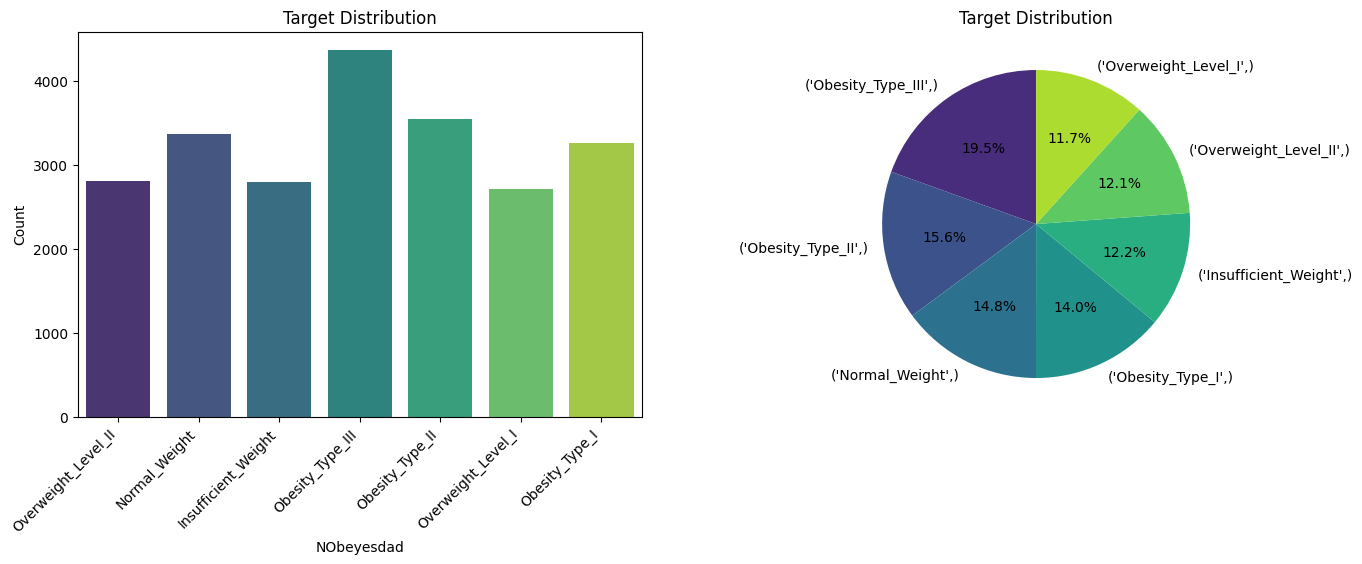

In [5]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(16, 5))  

plt.subplot(1, 2, 1)
sns.countplot(x=df_train["NObeyesdad"], palette='viridis')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title(f'{"Target Distribution"}')
plt.xticks(rotation=45, ha='right')  


plt.subplot(1, 2, 2)
cores = sns.color_palette('viridis', len(Target_counts))
plt.pie(Target_counts, labels=Target_counts.index, autopct='%1.1f%%', startangle=90, colors=cores)
plt.title(f'{"Target Distribution"}')
warnings.resetwarnings()

## Individual Numerical Plots

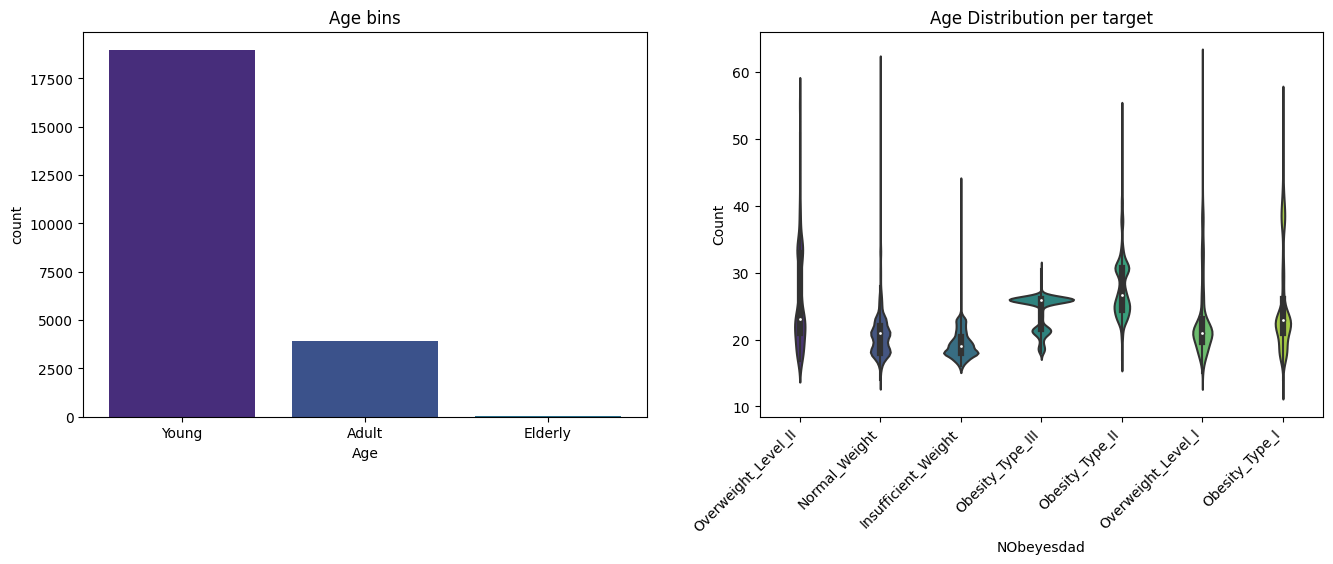

In [6]:
warnings.filterwarnings("ignore")
Age_limits = [14, 19, 59, float('inf')]

# Definir os rótulos dos grupos
Age_Groups = ['Young', 'Adult', 'Elderly']

# Criar a nova coluna 'Faixa Etária'
df_train['Age Range'] = pd.cut(df_train["Age"], bins=Age_limits, labels=Age_Groups, right=False)

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.bar(Age_Groups, df_train["Age Range"].value_counts(), color=cores)
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Age bins")

plt.subplot(1, 2, 2)
sns.violinplot(x=df_train["NObeyesdad"], y=df_train["Age"], palette='viridis')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title(f'{"Age Distribution per target"}')
plt.xticks(rotation=45, ha='right')
warnings.resetwarnings()

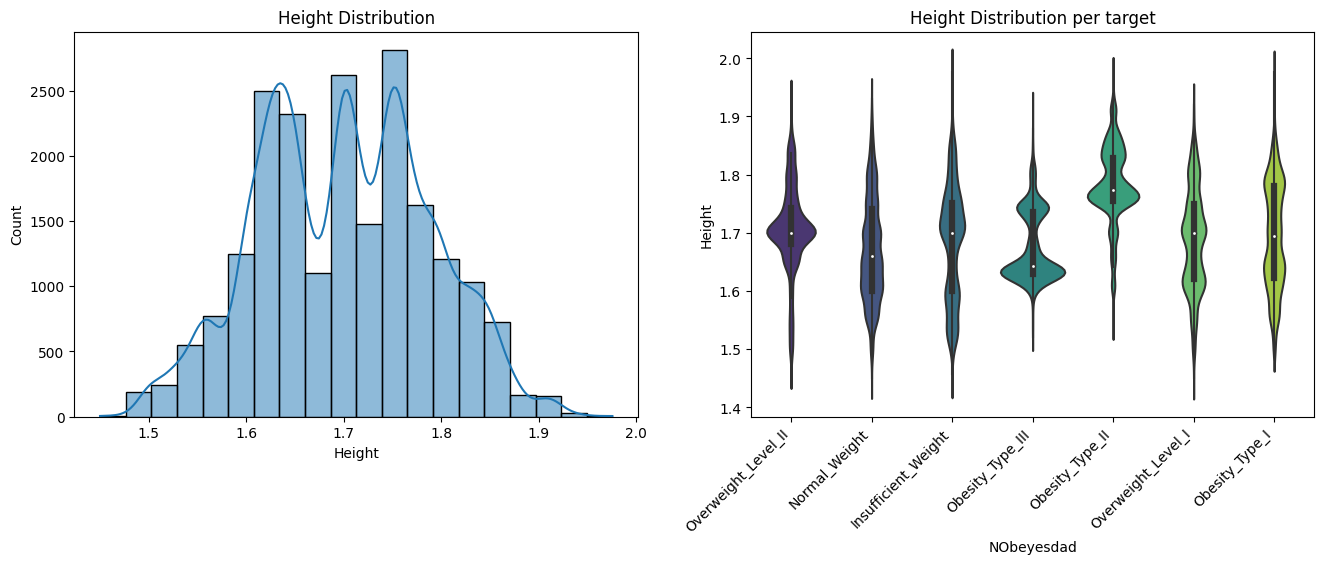

In [49]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train["Height"], bins=20, kde=True, edgecolor='black')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Height Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x=df_train["NObeyesdad"], y=df_train["Height"], palette='viridis')
plt.xlabel('NObeyesdad')
plt.ylabel('Height')
plt.title(f'{"Height Distribution per target"}')
plt.xticks(rotation=45, ha='right')

warnings.resetwarnings()

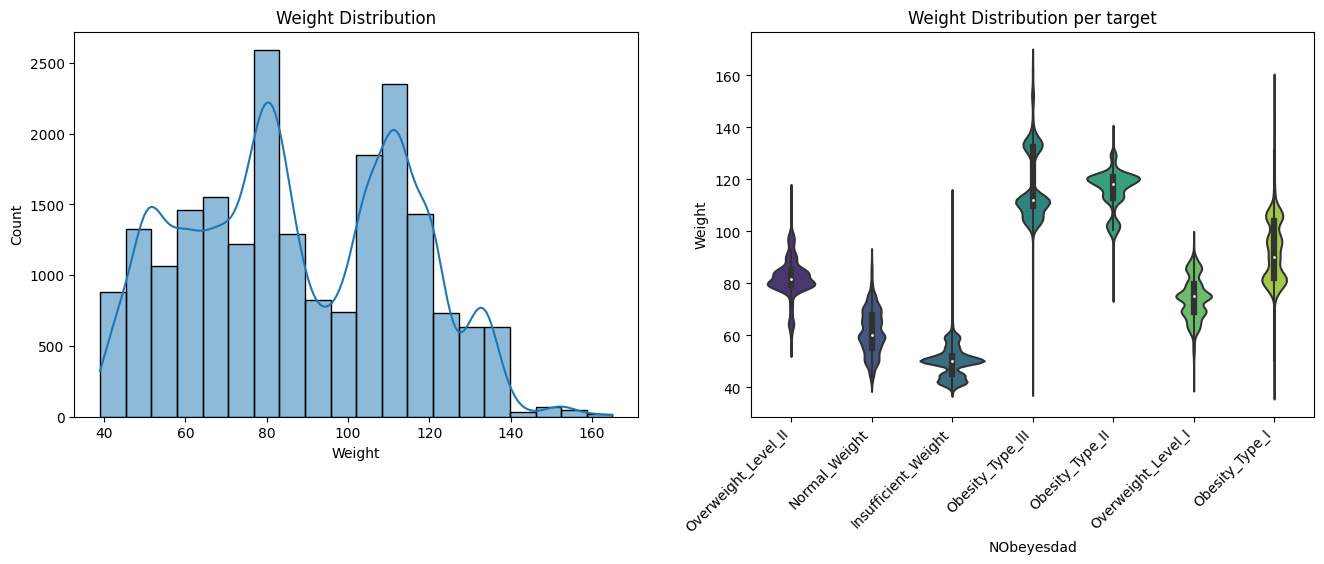

In [50]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train["Weight"], bins=20, kde=True, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x=df_train["NObeyesdad"], y=df_train["Weight"], palette='viridis')
plt.xlabel('NObeyesdad')
plt.ylabel('Weight')
plt.title(f'{"Weight Distribution per target"}')
plt.xticks(rotation=45, ha='right')
warnings.resetwarnings()

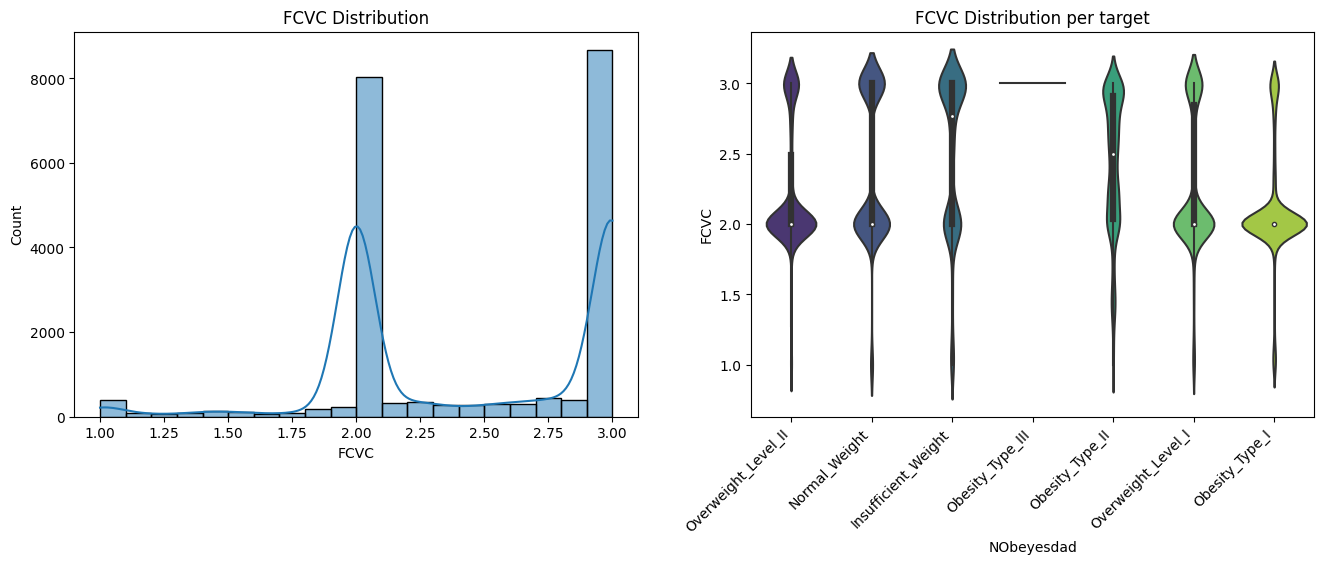

In [51]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train["FCVC"], bins=20, kde=True, edgecolor='black')
plt.xlabel('FCVC')
plt.ylabel('Count')
plt.title('FCVC Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x=df_train["NObeyesdad"], y=df_train["FCVC"], palette='viridis')
plt.xlabel('NObeyesdad')
plt.ylabel('FCVC')
plt.title(f'{"FCVC Distribution per target"}')
plt.xticks(rotation=45, ha='right')
warnings.resetwarnings()

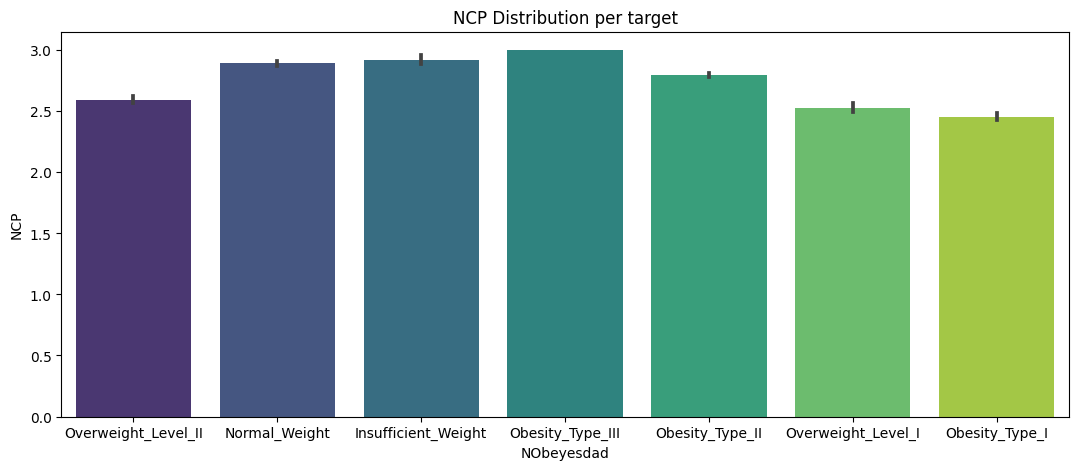

In [52]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(13, 5))
sns.barplot(x='NObeyesdad', y='NCP',data=df_train,palette='viridis')
plt.title(f'{"NCP Distribution per target"}')
warnings.resetwarnings()

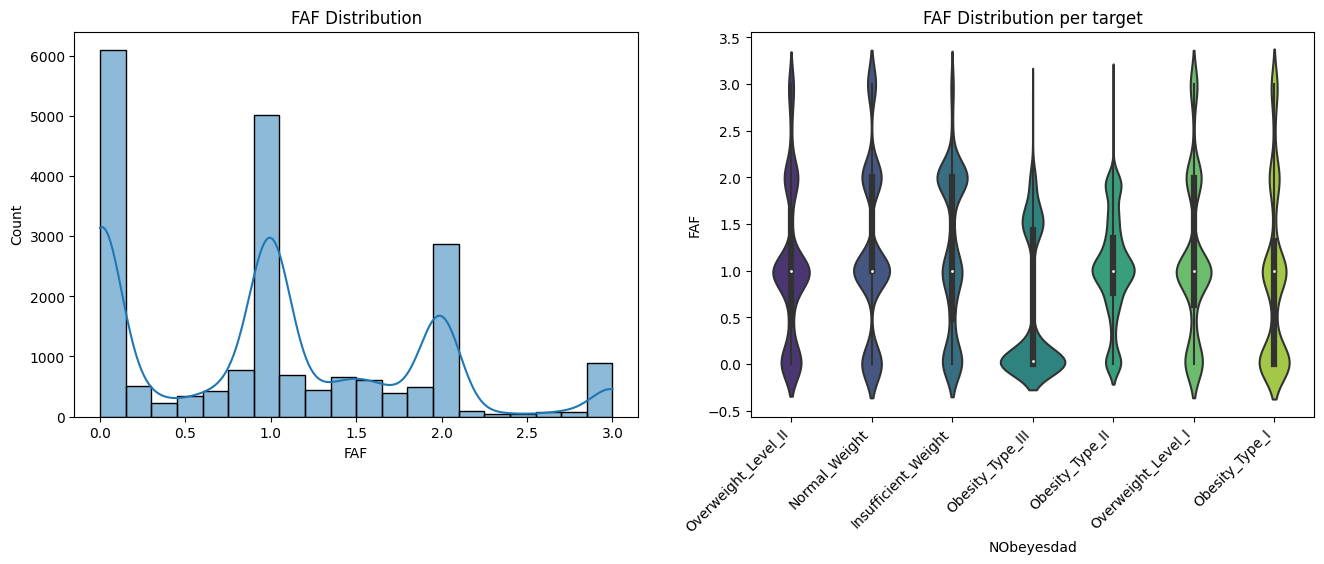

In [53]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train["FAF"], bins=20, kde=True, edgecolor='black')
plt.xlabel('FAF')
plt.ylabel('Count')
plt.title('FAF Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x=df_train["NObeyesdad"], y=df_train["FAF"], palette='viridis')
plt.xlabel('NObeyesdad')
plt.ylabel('FAF')
plt.title(f'{"FAF Distribution per target"}')
plt.xticks(rotation=45, ha='right')
warnings.resetwarnings()

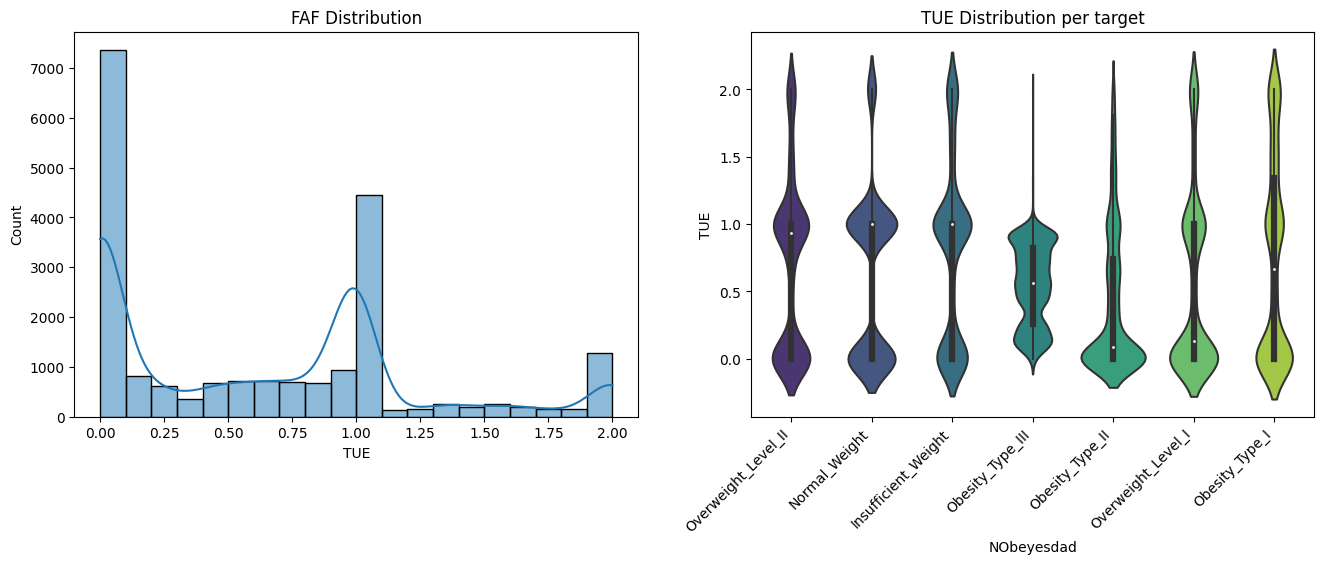

In [54]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train["TUE"], bins=20, kde=True, edgecolor='black')
plt.xlabel('TUE')
plt.ylabel('Count')
plt.title('FAF Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x=df_train["NObeyesdad"], y=df_train["TUE"], palette='viridis')
plt.xlabel('NObeyesdad')
plt.ylabel('TUE')
plt.title(f'{"TUE Distribution per target"}')
plt.xticks(rotation=45, ha='right')
warnings.resetwarnings()

## Individual Categorical Plots

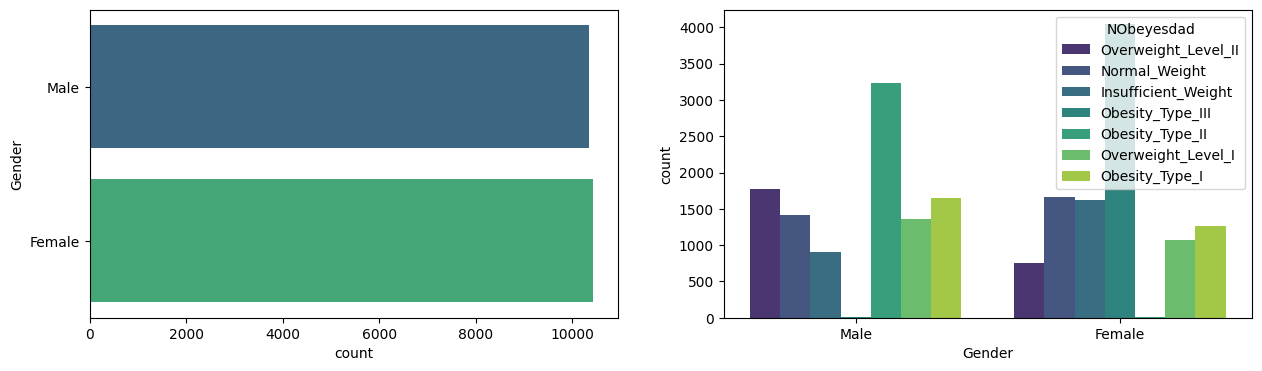

In [55]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=df_train["Gender"],data=df_train,palette="viridis")

plt.subplot(1, 2, 2)
sns.countplot(x=df_train["Gender"],data=df_train,hue=df_train["NObeyesdad"],palette="viridis")
warnings.resetwarnings()

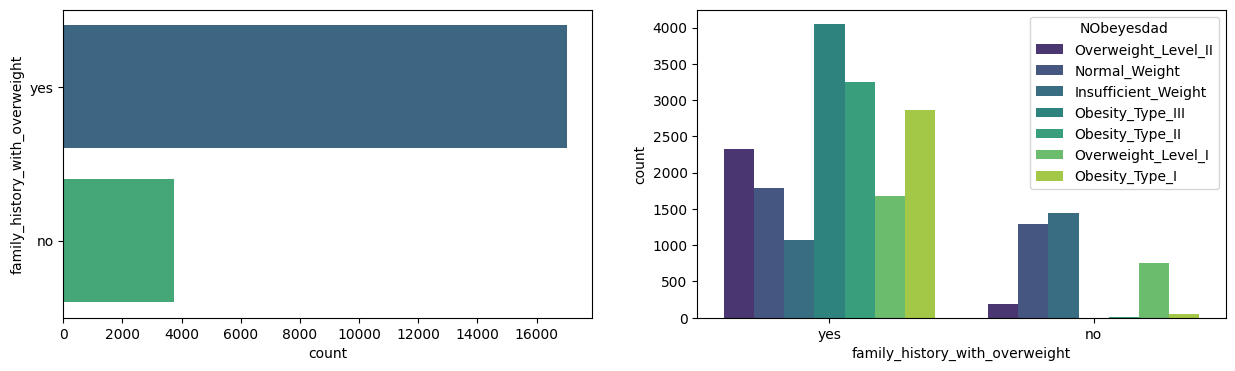

In [56]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=df_train["family_history_with_overweight"],data=df_train,palette="viridis")

plt.subplot(1, 2, 2)
sns.countplot(x=df_train["family_history_with_overweight"],data=df_train,hue=df_train["NObeyesdad"],palette="viridis")
warnings.resetwarnings()

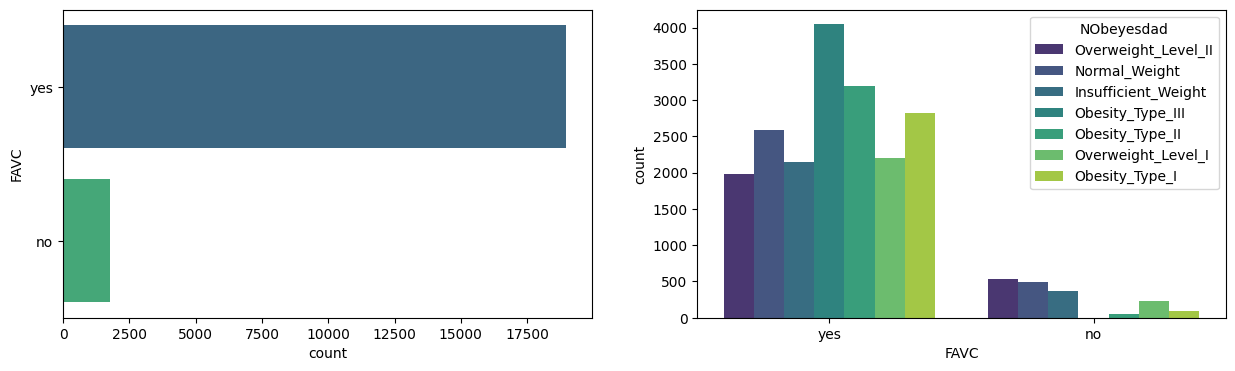

In [57]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=df_train["FAVC"],data=df_train,palette="viridis")

plt.subplot(1, 2, 2)
sns.countplot(x=df_train["FAVC"],data=df_train,hue=df_train["NObeyesdad"],palette="viridis")
warnings.resetwarnings()

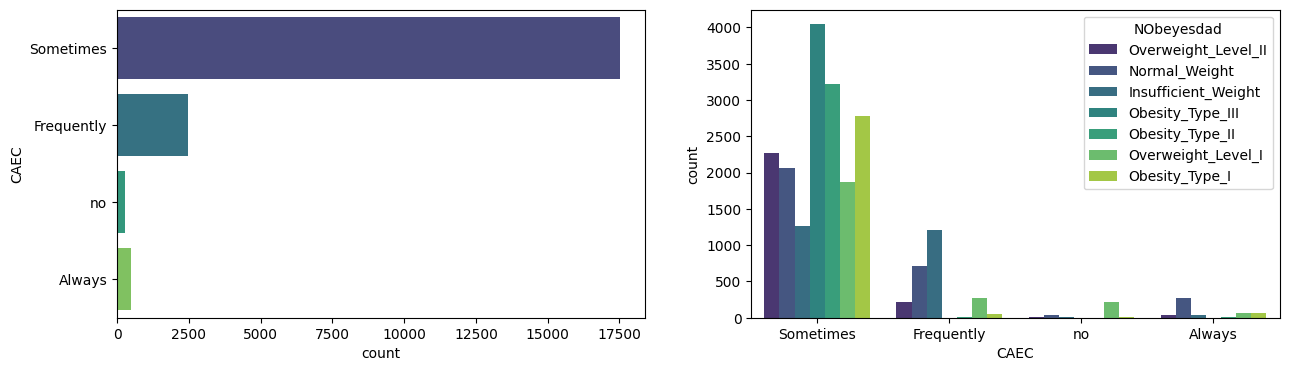

In [58]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=df_train["CAEC"],data=df_train,palette="viridis")

plt.subplot(1, 2, 2)
sns.countplot(x=df_train["CAEC"],data=df_train,hue=df_train["NObeyesdad"],palette="viridis")
warnings.resetwarnings()

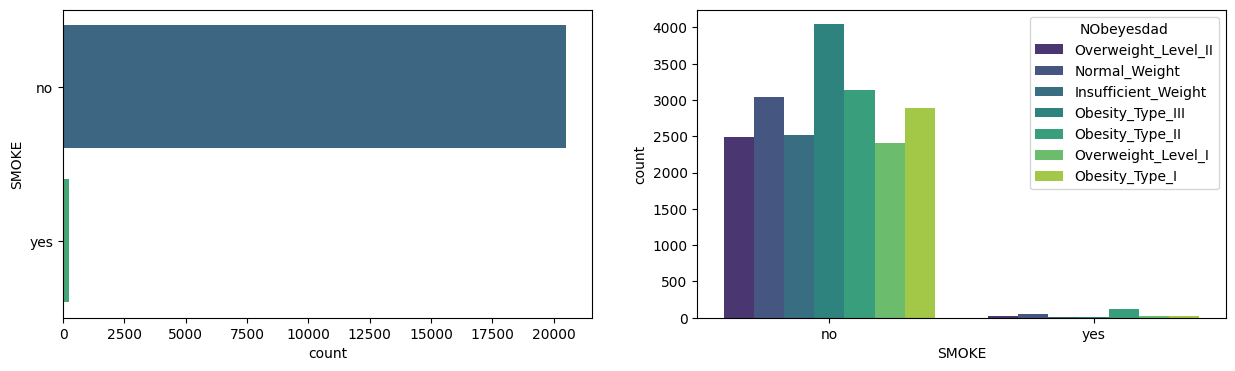

In [59]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=df_train["SMOKE"],data=df_train,palette="viridis")

plt.subplot(1, 2, 2)
sns.countplot(x=df_train["SMOKE"],data=df_train,hue=df_train["NObeyesdad"],palette="viridis")
warnings.resetwarnings()

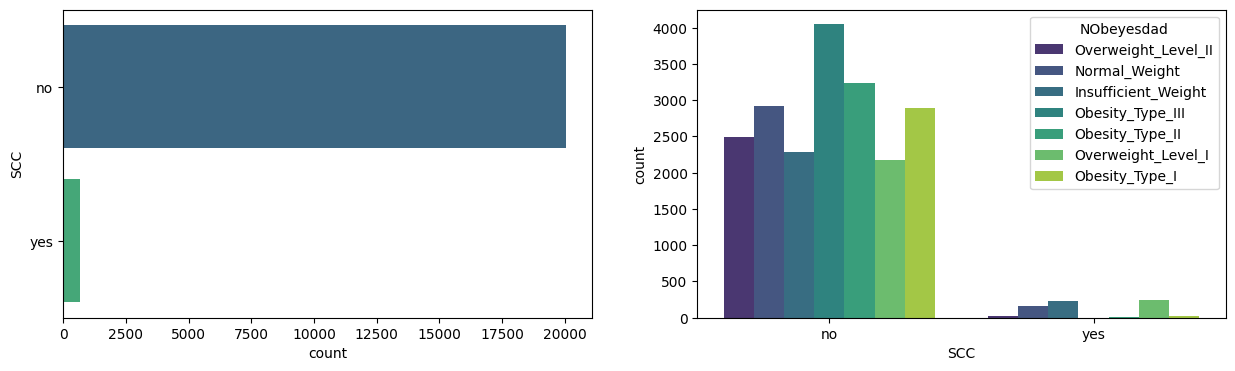

In [60]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=df_train["SCC"],data=df_train,palette="viridis")

plt.subplot(1, 2, 2)
sns.countplot(x=df_train["SCC"],data=df_train,hue=df_train["NObeyesdad"],palette="viridis")
warnings.resetwarnings()

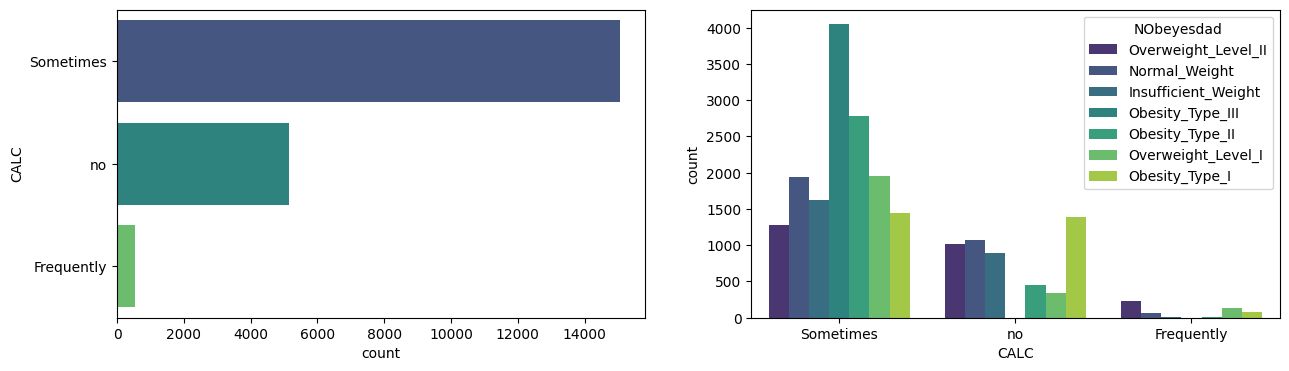

In [61]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=df_train["CALC"],data=df_train,palette="viridis")

plt.subplot(1, 2, 2)
sns.countplot(x=df_train["CALC"],data=df_train,hue=df_train["NObeyesdad"],palette="viridis")
warnings.resetwarnings()

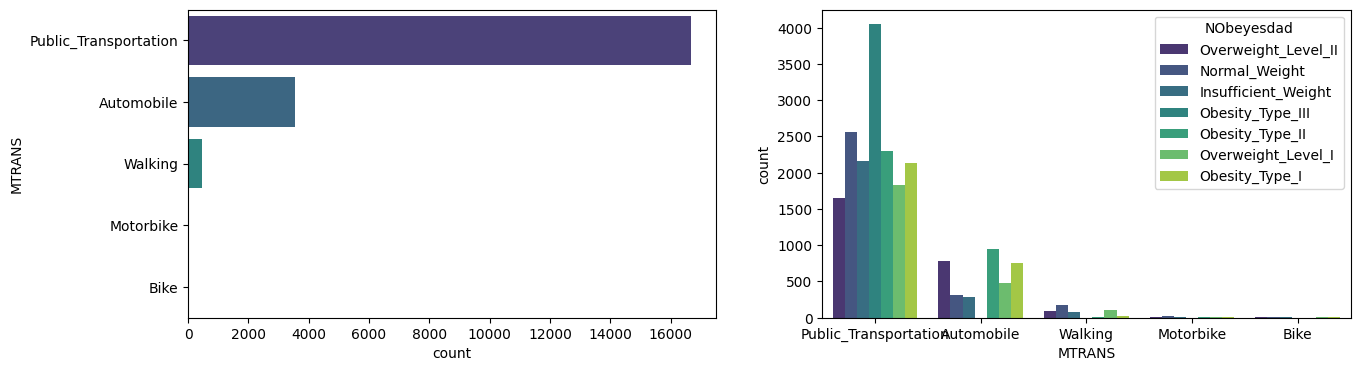

In [62]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=df_train["MTRANS"],data=df_train,palette="viridis")

plt.subplot(1, 2, 2)
sns.countplot(x=df_train["MTRANS"],data=df_train,hue=df_train["NObeyesdad"],palette="viridis")
warnings.resetwarnings()

## Combined Numerical Plots

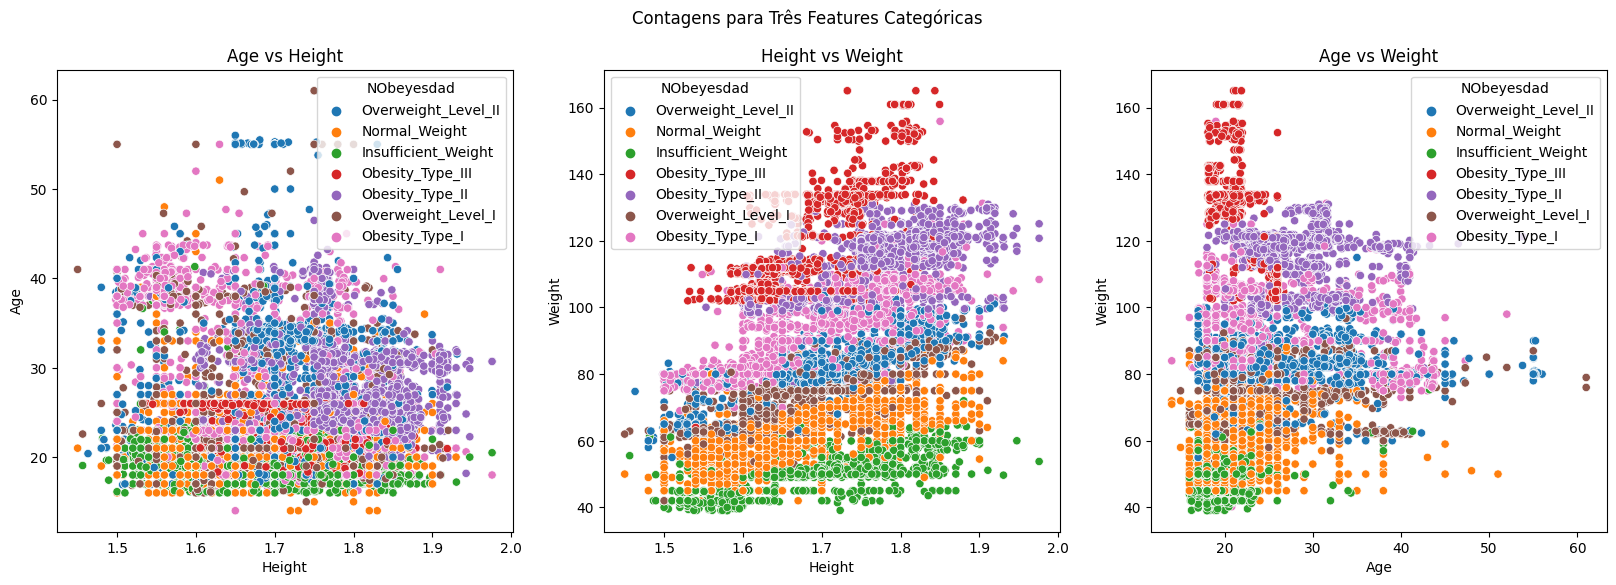

In [63]:
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico de barras para a primeira feature categórica
sns.scatterplot(data=df_train, x=df_train["Height"], y=df_train["Age"], hue=df_train["NObeyesdad"], ax=axs[0])
axs[0].set_title("Age vs Height")

# Gráfico de barras para a segunda feature categórica
sns.scatterplot(data=df_train, x=df_train["Height"], y=df_train["Weight"], hue=df_train["NObeyesdad"], ax=axs[1])
axs[1].set_title("Height vs Weight")

# Gráfico de barras para a terceira feature categórica
sns.scatterplot(data=df_train, x=df_train["Age"], y=df_train["Weight"], hue=df_train["NObeyesdad"], ax=axs[2])
axs[2].set_title("Age vs Weight") 

# Adicionando um título comum para os subgráficos
plt.suptitle('Contagens para Três Features Categóricas')

# Exibindo os gráficos lado a lado
plt.show()
warnings.resetwarnings()

## Features Engeneiring


In [7]:
df_train = pd.concat([df_train, original])
train = df_train.drop(['Age Range', 'id'], axis=1).drop_duplicates()
target =train[["NObeyesdad"]]
train = train.drop("NObeyesdad", axis="columns")
test = df_test.drop(['id'], axis=1)

In [8]:
#process the categorical features by enconding them using OneHotEncoder By Scikit-learn
warnings.filterwarnings("ignore")
categorical_features = train.columns[train.dtypes=="object"].tolist()

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(pd.concat([train[categorical_features]], axis=0))

train_encoded = encoder.transform(train[categorical_features])
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_features))
warnings.resetwarnings()

If CALC_Always consistently has a zero value during training, it may not contribute meaningfully and could pose issues during testing if CALC is an important feature. In order to address this, we can merge the columns CALC_Always and CALC_Frequently in both the train_encoded_df and test_encoded_df into a new column named 'CALC_Always|Frequently'. Once the combined column is created, we can safely drop the original CALC_Always and CALC_Frequently columns

In [9]:
combine_columns = ['CALC_Always', 'CALC_Frequently']
train_encoded_df['CALC_Always|Frequently'] = train_encoded_df[combine_columns].sum(axis=1)
train_encoded_df = train_encoded_df.drop(columns=combine_columns).set_index(train.index)
#Before moving forward, it's important to note that CALC and CAEC are ordinal features. To capture any linear effects stemming from these features, we can replace them with a single ordinal feature. This allows us to better represent and account for the ordered nature of CALC and CAEC in our analysis
levels = {"Always": 3, "Frequently": 2, "Sometimes": 1, "no": 0}
train["CALC_ord"] = train["CALC"].map(levels)
train["CAEC_ord"] = train["CAEC"].map(levels)
#Let's now integrate the categorical encodings in our original train, replacing the previous categorical features
train = pd.concat([train.drop(categorical_features, axis=1), train_encoded_df], axis=1)

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2.

In [10]:
X = train
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model

### Logistic Regression

In [31]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l1', 'l2', 'elasticnet'],
             'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
             'multi_class':['auto','ovr','multinomial']}

In [32]:
#Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.
warnings.filterwarnings("ignore")
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)
warnings.resetwarnings()

In [33]:
#e output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.8482717599728844


In [34]:
#alculate the accuracy on the test data using the method score
warnings.filterwarnings("ignore")
logreg_accuracy = logreg_cv.score(X_test, y_test)
logreg_accuracy
print("\nAccuracy:", logreg_accuracy)
warnings.resetwarnings()


Accuracy: 0.8564237251039615


In [35]:
warnings.filterwarnings("ignore")
yhat=logreg_cv.predict(X_test)
warnings.resetwarnings()

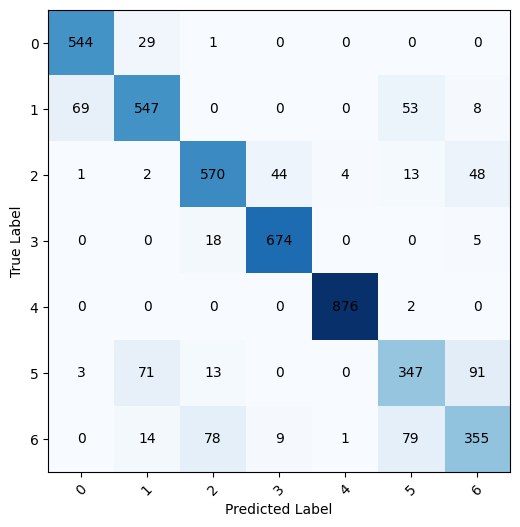

In [36]:
#Lets look at the confusion matrix
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, yhat)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()
warnings.resetwarnings()

### Decision Tree


In [12]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [13]:
warnings.filterwarnings("ignore")
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)
warnings.resetwarnings()

In [14]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8019279252735829


In [18]:

tree_accuracy = tree_cv.score(X_test, y_test)
tree_accuracy


/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map

0.7509301816590064

In [19]:
warnings.filterwarnings("ignore")
yhat=tree_cv.predict(X_test)
warnings.resetwarnings()

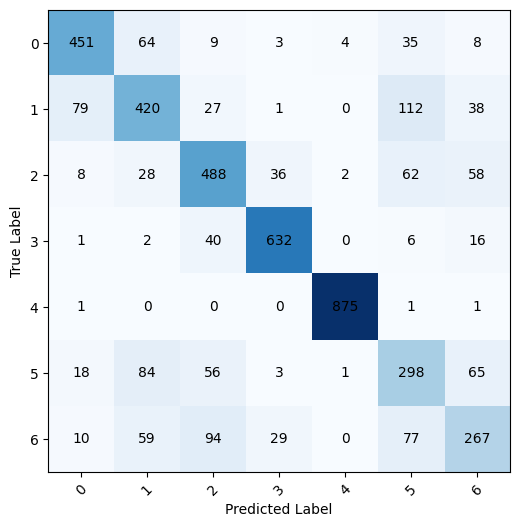

In [20]:
#Lets look at the confusion matrix
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, yhat)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()
warnings.resetwarnings()

### K-Nearest Neighbours

In [21]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [22]:
warnings.filterwarnings("ignore")
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, y_train)
warnings.resetwarnings()

In [23]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1}
accuracy : 0.868736129226207


In [24]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map

0.8618953819216458

In [26]:
warnings.filterwarnings("ignore")
yhat=knn_cv.predict(X_test)
warnings.resetwarnings()

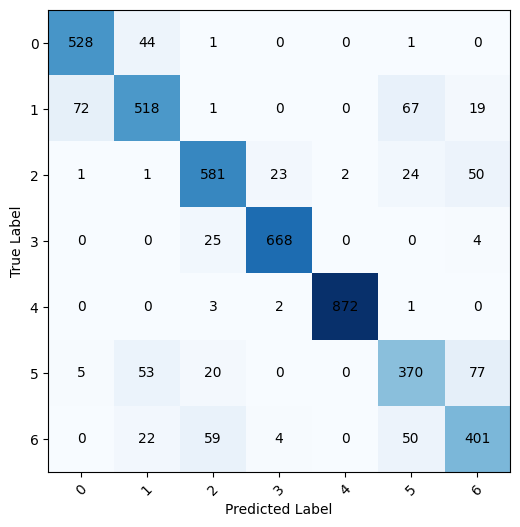

In [27]:
#Lets look at the confusion matrix
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, yhat)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()
warnings.resetwarnings()

In [41]:
# Examining the scores from the whole Dataset
warnings.filterwarnings("ignore")
jaccard_scores = [
                  jaccard_score(y_test, logreg_cv.predict(X_test), average='macro'),
                  jaccard_score(y_test, tree_cv.predict(X_test), average='macro'),
                  jaccard_score(y_test, knn_cv.predict(X_test), average='macro'),
                 ]

f1_scores = [
             f1_score(y_test, logreg_cv.predict(X_test), average='macro'),
             
             f1_score(y_test, tree_cv.predict(X_test), average='macro'),
             f1_score(y_test, knn_cv.predict(X_test), average='macro'),
            ]

accuracy = [logreg_cv.score(X_test, y_test), tree_cv.score(X_test, y_test), knn_cv.score(X_test, y_test)]

scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]),
                      index=['Jaccard_Score', 'F1_Score', 'Accuracy'],
                      columns=['LogReg', 'Tree', 'KNN'])
warnings.resetwarnings()
scores

,LogReg,Tree,KNN
Jaccard_Score,0.739055,0.599185,0.749104
F1_Score,0.838768,0.727027,0.847748
Accuracy,0.856424,0.750930,0.861895


## Submission

In [42]:
warnings.filterwarnings("ignore")
test = df_test.drop(['id'], axis=1)
categorical_features1 = test.columns[test.dtypes=="object"].tolist()

test_encoded = encoder.fit_transform(test[categorical_features1])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_features1))

test_encoded_df['CALC_Always|Frequently'] = test_encoded_df[combine_columns].sum(axis=1)
test_encoded_df = test_encoded_df.drop(columns=combine_columns).set_index(test.index)

test["CALC_ord"] = test["CALC"].map(levels)
test["CAEC_ord"] = test["CAEC"].map(levels)  

test = pd.concat([test.drop(categorical_features1, axis=1), test_encoded_df], axis=1)
warnings.resetwarnings()

In [43]:
prediction = knn_cv.predict(test)
prediction

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_II'],
      dtype=object)

In [44]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission["NObeyesdad"] = prediction
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Insufficient_Weight


In [45]:
submission.to_csv("submission2.csv", index=False)
train.to_csv("train_cleaned.csv", index=False)
test.to_csv("test_cleaned.csv", index=False)